#### Загрузка данных

Ирисы Фишера -- набор данных для задачи классификации, на примере которого Рональд Фишер в 1936 году продемонстрировал работу разработанного им метода дискриминантного анализа. Иногда его также называют ирисами Андерсона, так как данные были собраны американским ботаником Эдгаром Андерсоном. Этот набор данных стал классическим и часто используется в литературе для иллюстрации работы различных статистических алгоритмов.

Ирисы Фишера состоят из данных о 150 экземплярах ириса, по 50 экземпляров из трёх видов -- Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor).

Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):
1. Длина наружной доли околоцветника (англ. sepal length);
2. Ширина наружной доли околоцветника (англ. sepal width);
3. Длина внутренней доли околоцветника (англ. petal length);
4. Ширина внутренней доли околоцветника (англ. petal width).

На основании этого набора данных требуется построить правило классификации, определяющее вид растения по данным измерений. Это задача многоклассовой классификации, так как имеется три класса -- три вида ириса.

Один из классов (Iris setosa) линейно-разделим от двух остальных.

In [1]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()

irisdf = pd.DataFrame(data=iris.data, columns=iris.feature_names)  # type: ignore
display(irisdf.head())
display(irisdf.tail())

y = iris.target  # type: ignore
display(y)

y_names = iris.target_names  # type: ignore
display(y_names)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### Визуализация данных с учетом понимания из особенностей

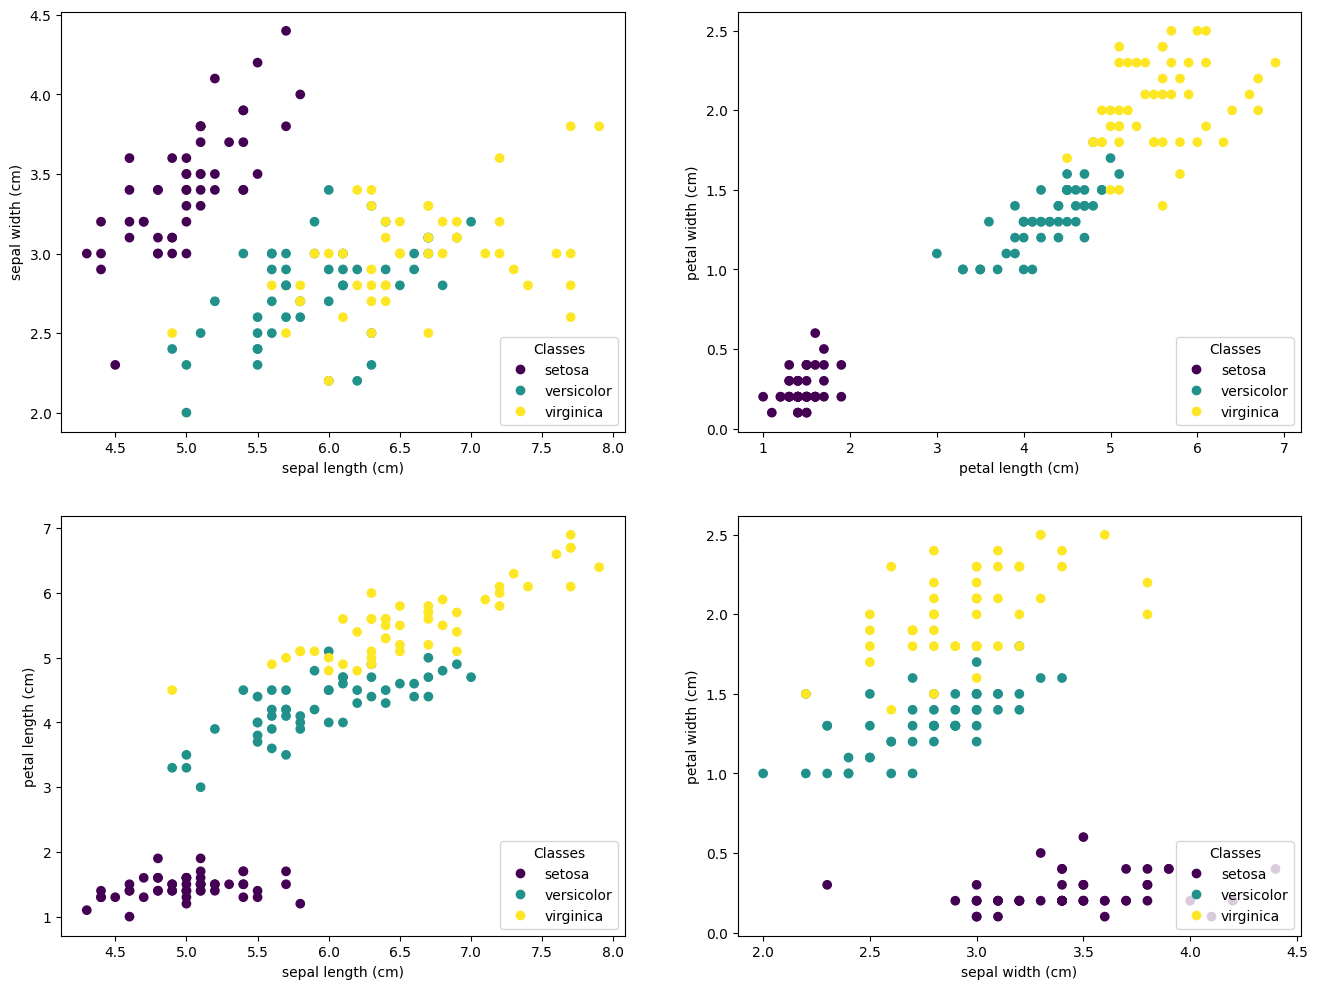

In [2]:
from src.visual import draw_data_2d
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
draw_data_2d(irisdf, 0, 1, y, y_names, plt.subplot(2, 2, 1))
draw_data_2d(irisdf, 2, 3, y, y_names, plt.subplot(2, 2, 2))
draw_data_2d(irisdf, 0, 2, y, y_names, plt.subplot(2, 2, 3))
draw_data_2d(irisdf, 1, 3, y, y_names, plt.subplot(2, 2, 4))

#### Визуализация данных без понимания их особенностей

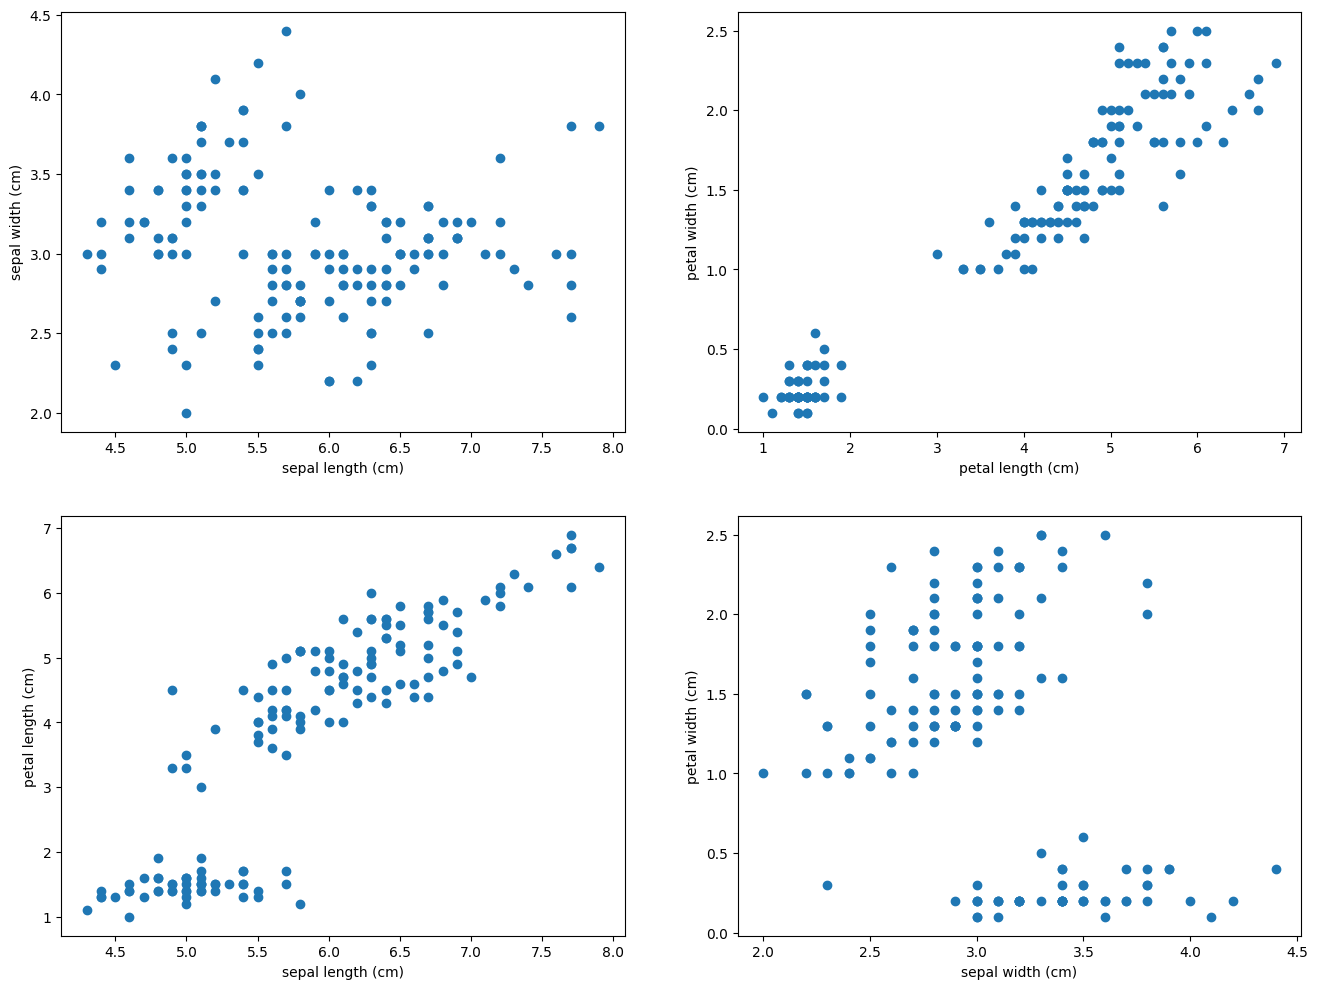

In [3]:
plt.figure(figsize=(16, 12))
draw_data_2d(irisdf, 0, 1, subplot=plt.subplot(2, 2, 1))
draw_data_2d(irisdf, 2, 3, subplot=plt.subplot(2, 2, 2))
draw_data_2d(irisdf, 0, 2, subplot=plt.subplot(2, 2, 3))
draw_data_2d(irisdf, 1, 3, subplot=plt.subplot(2, 2, 4))

#### Иерархическая агломеративная кластеризация

Также формируется дендрограмма

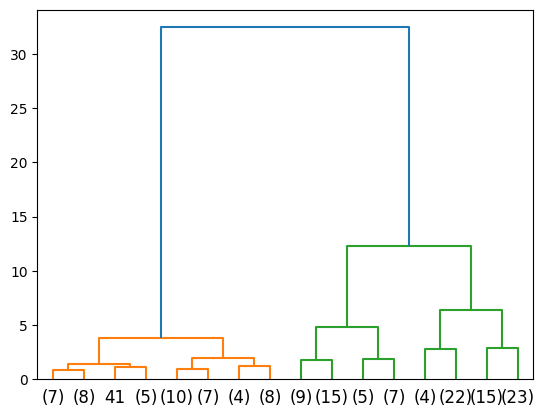

In [4]:
from src.clusters import get_linkage_matrix, run_agglomerative
from src.visual import draw_dendrogram
from scipy.cluster import hierarchy

tree = run_agglomerative(irisdf)
linkage_matrix = get_linkage_matrix(tree)
draw_dendrogram(linkage_matrix)

#### Получение результатов иерархической кластеризации

Также производится сравнение с реальным разбиением

https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

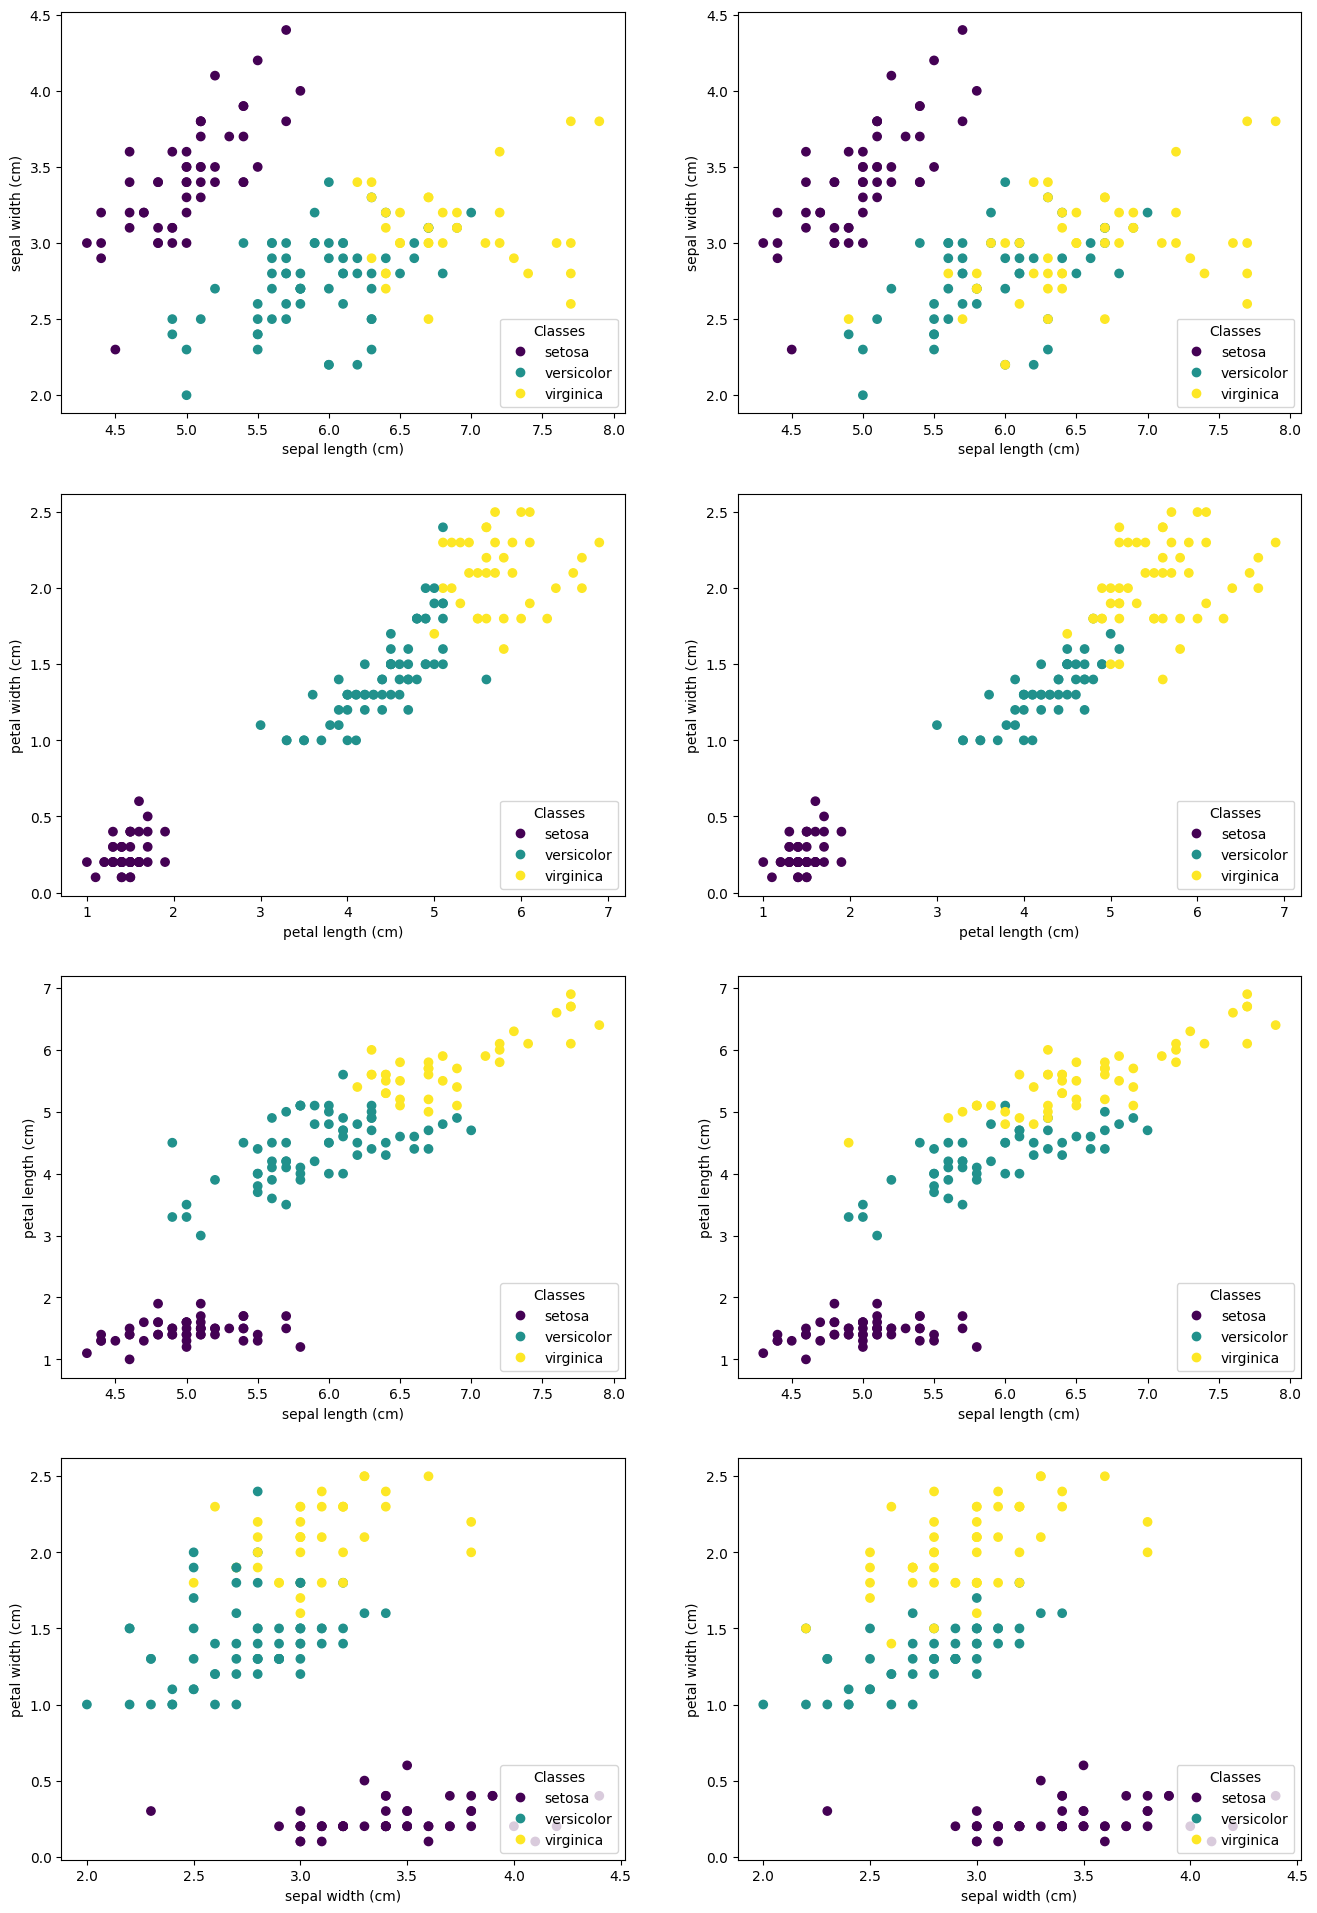

In [5]:
result = hierarchy.fcluster(linkage_matrix, 10, criterion="distance")
display(result)
display(y)
result = [0 if val == 1 else 1 if val == 3 else 2 for val in result]

plt.figure(figsize=(16, 24))
draw_data_2d(irisdf, 0, 1, result, y_names, plt.subplot(4, 2, 1))
draw_data_2d(irisdf, 0, 1, y, y_names, plt.subplot(4, 2, 2))
draw_data_2d(irisdf, 2, 3, result, y_names, plt.subplot(4, 2, 3))
draw_data_2d(irisdf, 2, 3, y, y_names, plt.subplot(4, 2, 4))
draw_data_2d(irisdf, 0, 2, result, y_names, plt.subplot(4, 2, 5))
draw_data_2d(irisdf, 0, 2, y, y_names, plt.subplot(4, 2, 6))
draw_data_2d(irisdf, 1, 3, result, y_names, plt.subplot(4, 2, 7))
draw_data_2d(irisdf, 1, 3, y, y_names, plt.subplot(4, 2, 8))

#### Неиерархическая четка кластеризация (k-means)

In [6]:
from src.clusters import print_cluster_result, run_kmeans

random_state = 9

labels, centers = run_kmeans(irisdf, 2, random_state)
print_cluster_result(irisdf, 2, labels)
display(centers)
display(y)

Cluster 1 (53):
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 57, 93, 98

--------
Cluster 2 (97):
50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149

--------


array([[5.00566038, 3.36981132, 1.56037736, 0.29056604],
       [6.30103093, 2.88659794, 4.95876289, 1.69587629]])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Визуализация результатов кластеризации

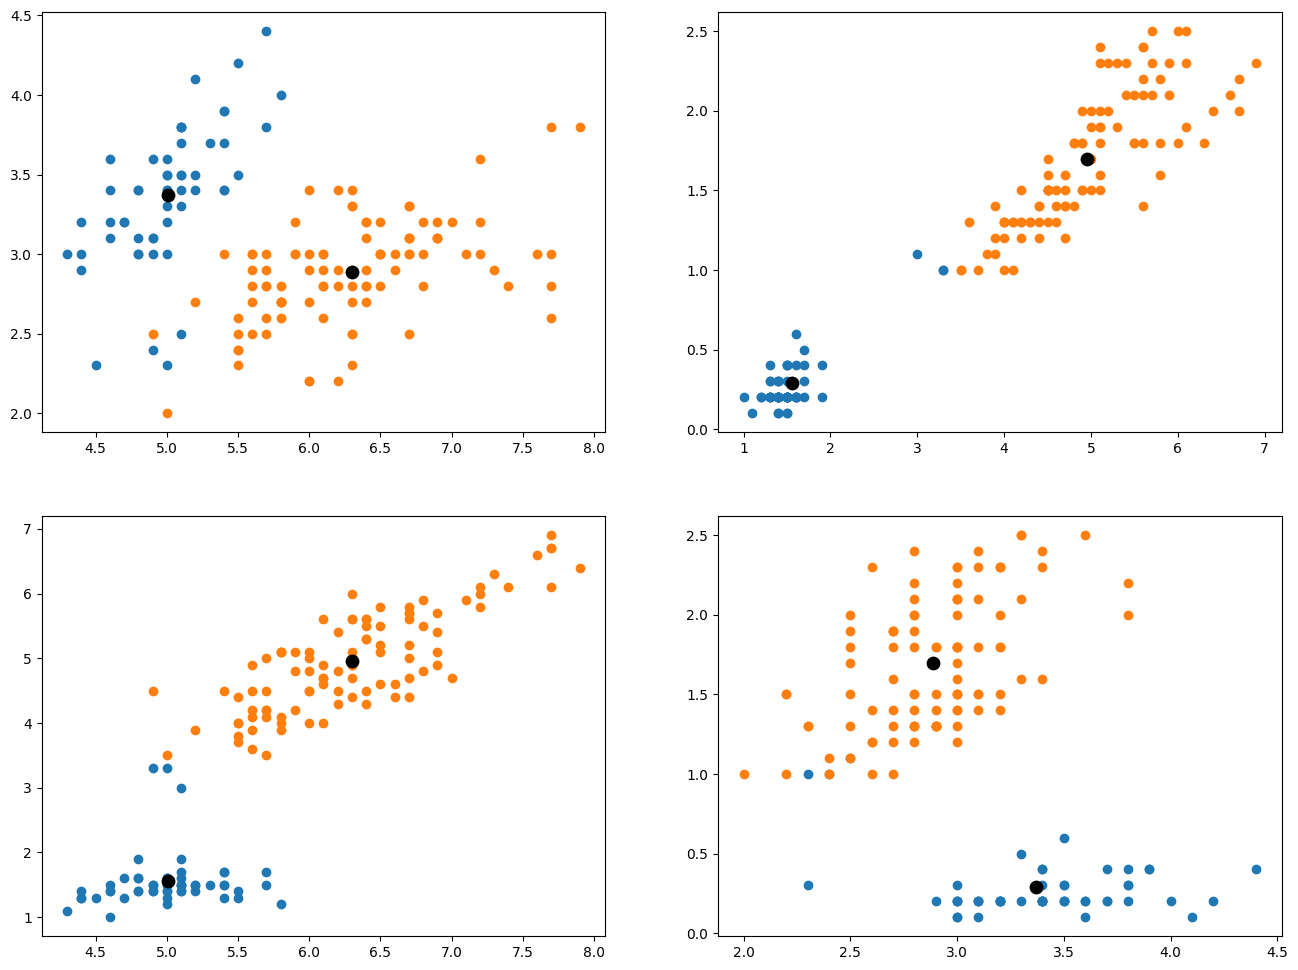

In [7]:
from src.visual import draw_cluster_results

plt.figure(figsize=(16, 12))
draw_cluster_results(irisdf, 0, 1, labels, centers, plt.subplot(2, 2, 1))
draw_cluster_results(irisdf, 2, 3, labels, centers, plt.subplot(2, 2, 2))
draw_cluster_results(irisdf, 0, 2, labels, centers, plt.subplot(2, 2, 3))
draw_cluster_results(irisdf, 1, 3, labels, centers, plt.subplot(2, 2, 4))

#### Разбиение на 3 кластера и сравнение с реальным разбиением

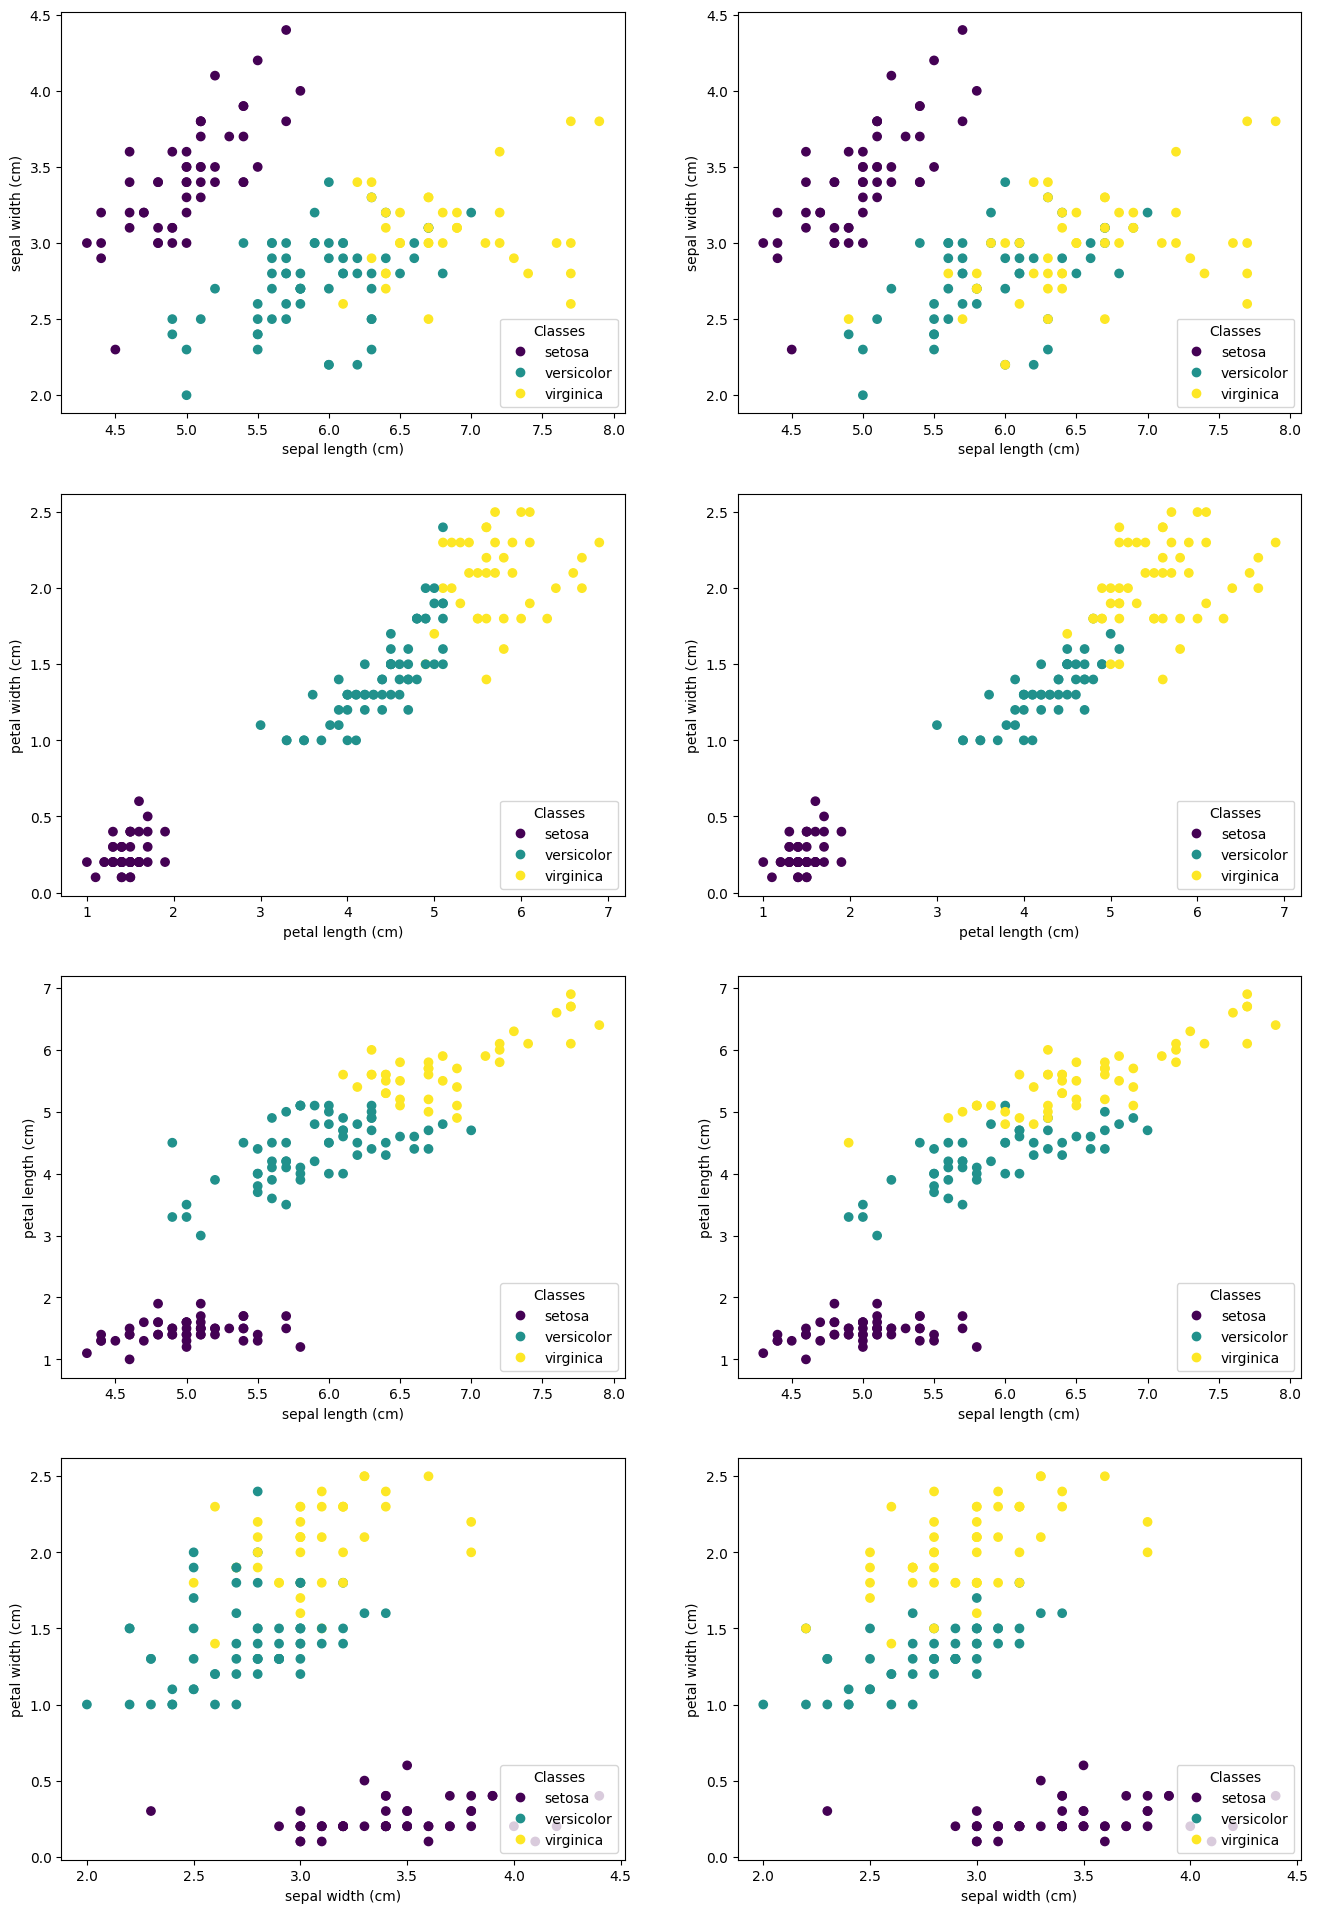

In [8]:
labels, centers = run_kmeans(irisdf, 3, random_state)
labels = [2 if val == 1 else 1 if val == 2 else val for val in labels]

plt.figure(figsize=(16, 24))
draw_data_2d(irisdf, 0, 1, labels, y_names, plt.subplot(4, 2, 1))
draw_data_2d(irisdf, 0, 1, y, y_names, plt.subplot(4, 2, 2))
draw_data_2d(irisdf, 2, 3, labels, y_names, plt.subplot(4, 2, 3))
draw_data_2d(irisdf, 2, 3, y, y_names, plt.subplot(4, 2, 4))
draw_data_2d(irisdf, 0, 2, labels, y_names, plt.subplot(4, 2, 5))
draw_data_2d(irisdf, 0, 2, y, y_names, plt.subplot(4, 2, 6))
draw_data_2d(irisdf, 1, 3, labels, y_names, plt.subplot(4, 2, 7))
draw_data_2d(irisdf, 1, 3, y, y_names, plt.subplot(4, 2, 8))

#### Понижение размерности до n=2

In [9]:
from sklearn.decomposition import PCA


reduced_data = PCA(n_components=2).fit_transform(irisdf)
reduced_data

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

#### Визуализация данных после понижения размерности

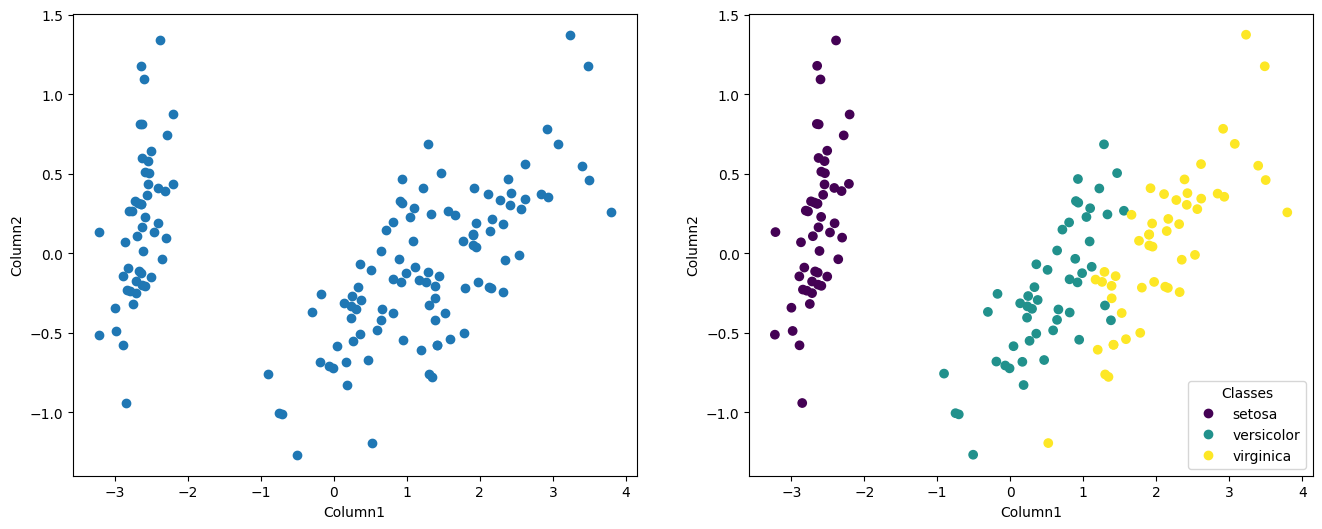

In [10]:
plt.figure(figsize=(16, 6))
draw_data_2d(
    pd.DataFrame({"Column1": reduced_data[:, 0], "Column2": reduced_data[:, 1]}),
    0,
    1,
    subplot=plt.subplot(1, 2, 1),
)
draw_data_2d(
    pd.DataFrame({"Column1": reduced_data[:, 0], "Column2": reduced_data[:, 1]}),
    0,
    1,
    y,
    y_names,
    plt.subplot(1, 2, 2),
)

#### Визуализация результатов неиерархической кластеризации для двух кластеров с учетом понижения размерности

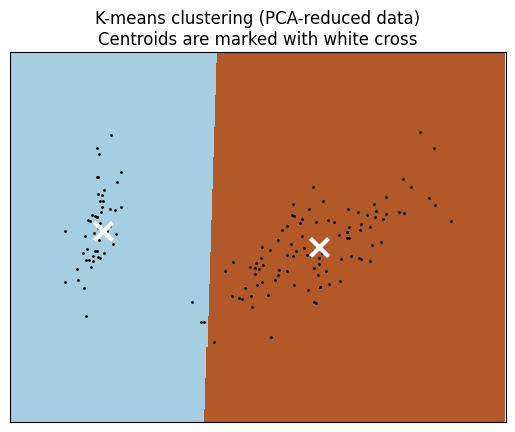

In [11]:
from src.clusters import fit_kmeans
from src.visual import draw_clusters


kmeans = fit_kmeans(reduced_data, 2, random_state)
draw_clusters(reduced_data, kmeans)

#### Визуализация результатов неиерархической кластеризации для трех кластеров с учетом понижения размерности

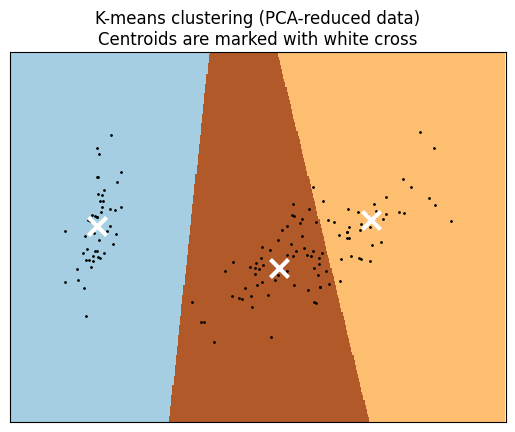

In [12]:
kmeans = fit_kmeans(reduced_data, 3, random_state)
draw_clusters(reduced_data, kmeans)

#### Сравнение результатов кластеризации с реальным разбиением с учетом понижения размерности

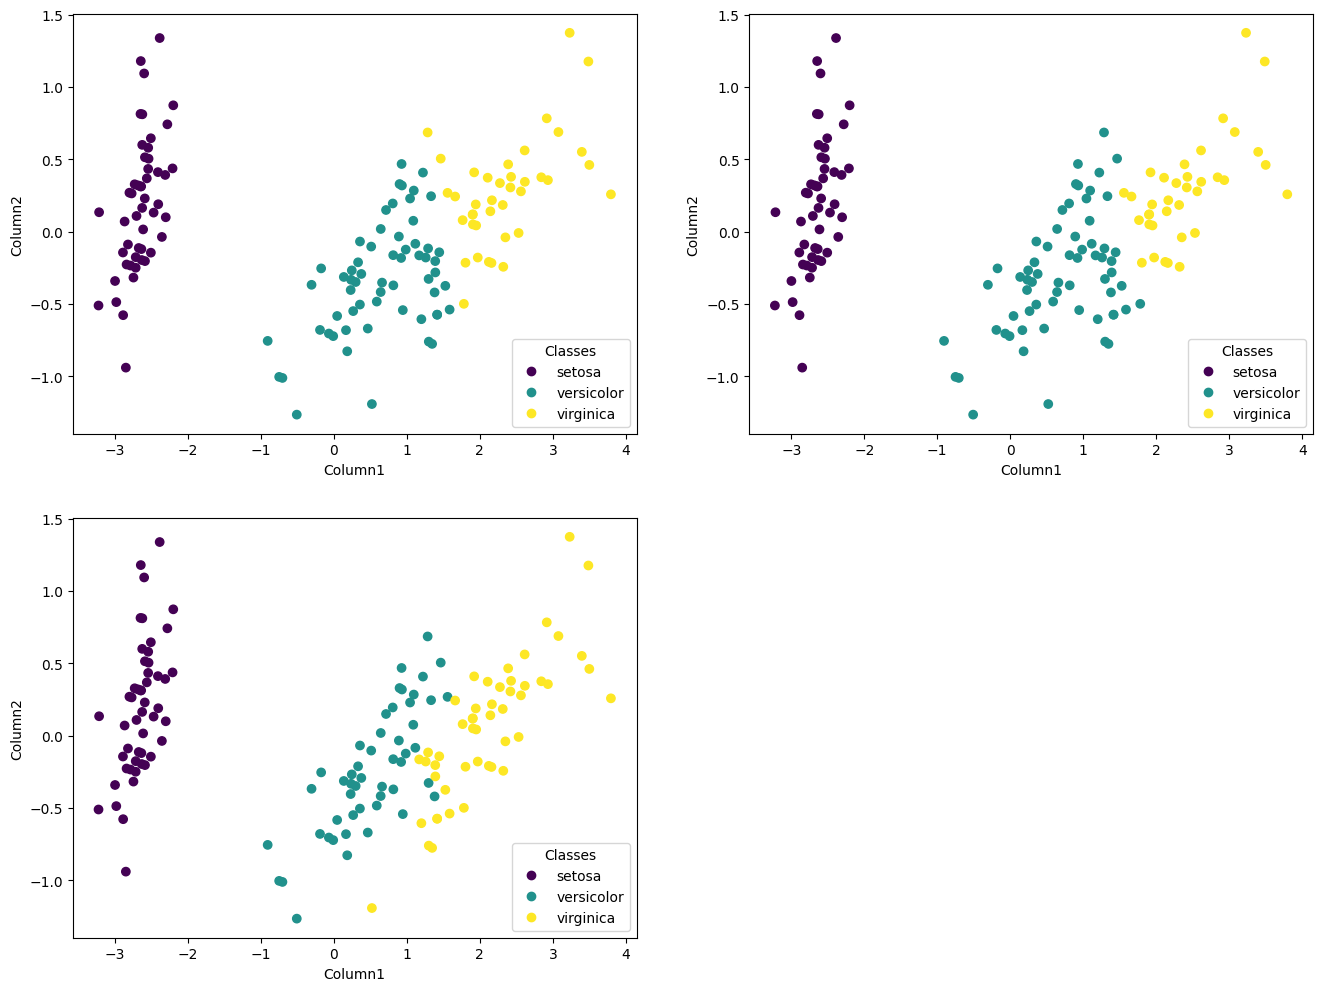

In [13]:
labels = [2 if val == 1 else 1 if val == 2 else val for val in kmeans.labels_]

plt.figure(figsize=(16, 12))
draw_data_2d(
    pd.DataFrame({"Column1": reduced_data[:, 0], "Column2": reduced_data[:, 1]}),
    0,
    1,
    labels,
    y_names,
    plt.subplot(2, 2, 1),
)
draw_data_2d(
    pd.DataFrame({"Column1": reduced_data[:, 0], "Column2": reduced_data[:, 1]}),
    0,
    1,
    result,
    y_names,
    plt.subplot(2, 2, 2),
)
draw_data_2d(
    pd.DataFrame({"Column1": reduced_data[:, 0], "Column2": reduced_data[:, 1]}),
    0,
    1,
    y,
    y_names,
    plt.subplot(2, 2, 3),
)

#### Выбор количества кластеров на основе инерции

Инерция -- сумма квадратов расстояний выборок до ближайшего центра кластера, взвешенная по весам выборок, если таковые имеются.

range(2, 13)

[152.3479517603579,
 78.85144142614601,
 57.25600931571815,
 49.84981451052335,
 39.03998724608725,
 35.73675177600178,
 30.186555194805198,
 28.74142653983444,
 26.572328111946536,
 25.281078256538784,
 24.845747490899196]

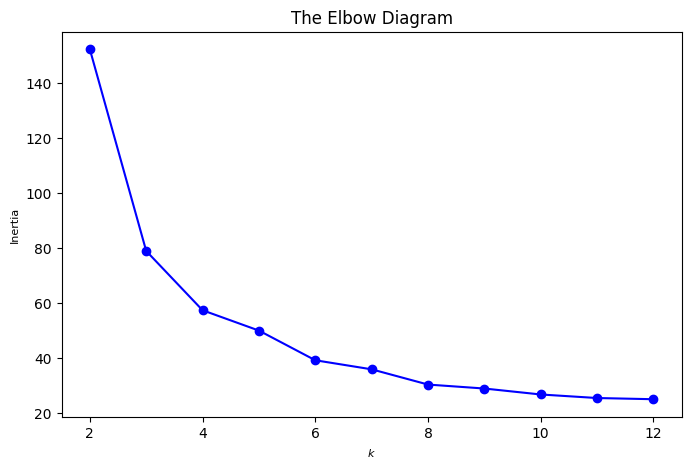

In [14]:
from src.clusters import get_clusters_inertia
from src.visual import draw_elbow_diagram


inertias, clusters_range = get_clusters_inertia(irisdf, random_state)
display(clusters_range)
display(inertias)
draw_elbow_diagram(inertias, clusters_range)

#### Выбор количества кластеров на основе коэффициента силуэта

Коэффициент силуэта рассчитывается с использованием среднего расстояния внутри кластера (а) и среднего расстояния до ближайшего кластера (b) для каждого образца. Коэффициент силуэта для образца равен (b - a) / max(a, b). Для пояснения: b — это расстояние между образцом и ближайшим кластером, частью которого образец не является. Обратите внимание, что коэффициент силуэта определяется только в том случае, если количество меток равно 2 <= n_labels <= n_samples - 1.

Эта функция возвращает средний коэффициент силуэта по всем образцам. 

Лучшее значение — 1, худшее — -1. Значения около 0 указывают на перекрывающиеся кластеры. Отрицательные значения обычно указывают на то, что образец был отнесен к неправильному кластеру.

range(2, 13)

[0.6810461692117462,
 0.5528190123564095,
 0.4974551890173751,
 0.37267902612312465,
 0.36483400396700255,
 0.3177403273169618,
 0.35745369258527154,
 0.3357877717812255,
 0.31153956064328736,
 0.2897041029666296,
 0.28314769898585324]

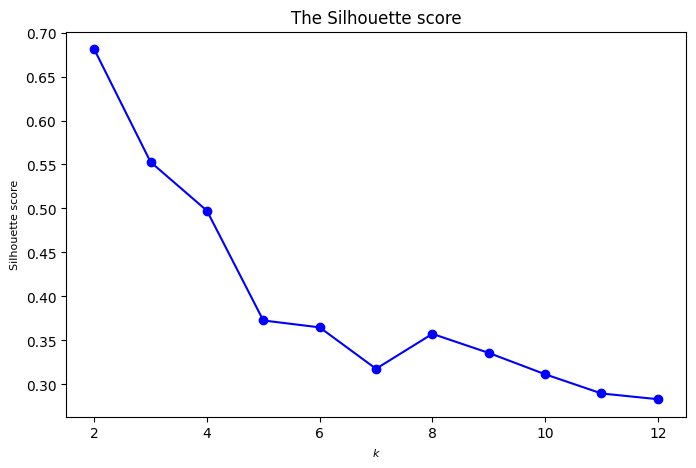

In [15]:
from src.clusters import get_clusters_silhouette_scores
from src.visual import draw_silhouettes_diagram

silhouette_scores, clusters_range = get_clusters_silhouette_scores(irisdf, random_state)
display(clusters_range)
display(silhouette_scores)
draw_silhouettes_diagram(silhouette_scores, clusters_range)

#### Пример анализа силуэтов для разбиения от 2 до 12 кластеров

max_clusters = int(math.sqrt(len(df)))

https://scikit-learn.org/1.5/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

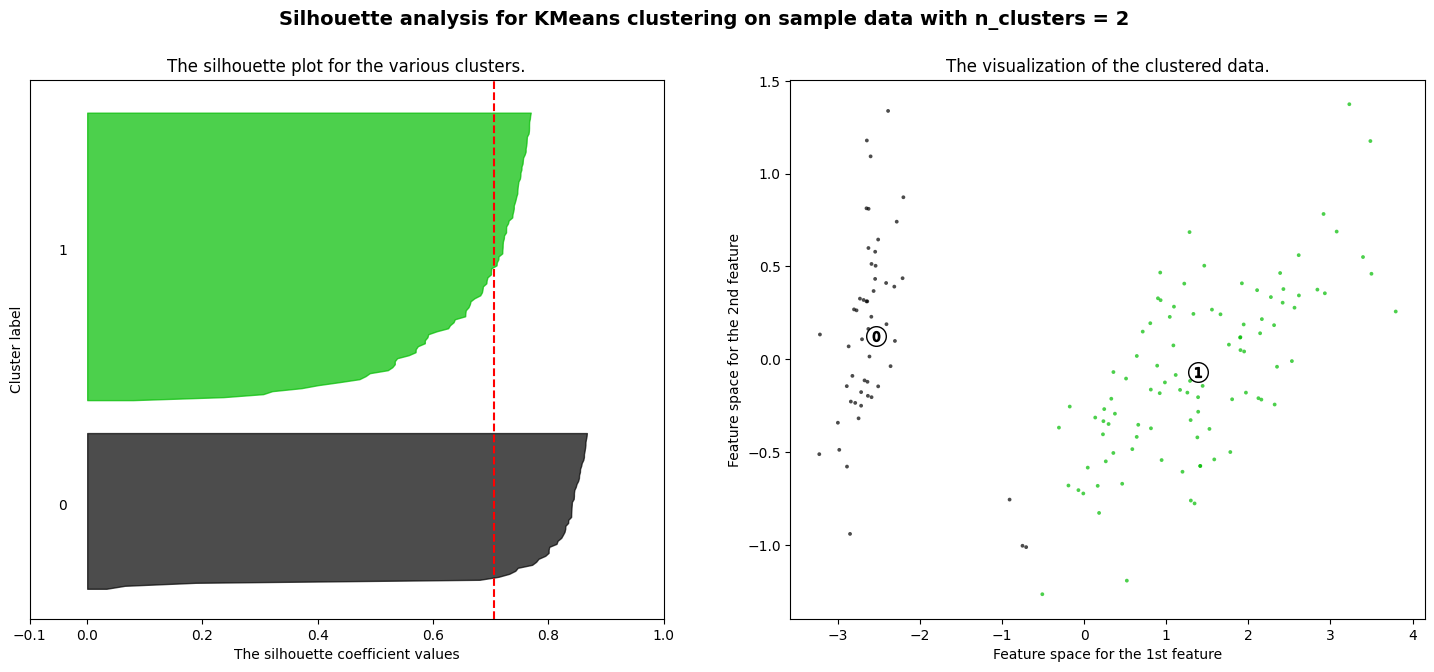

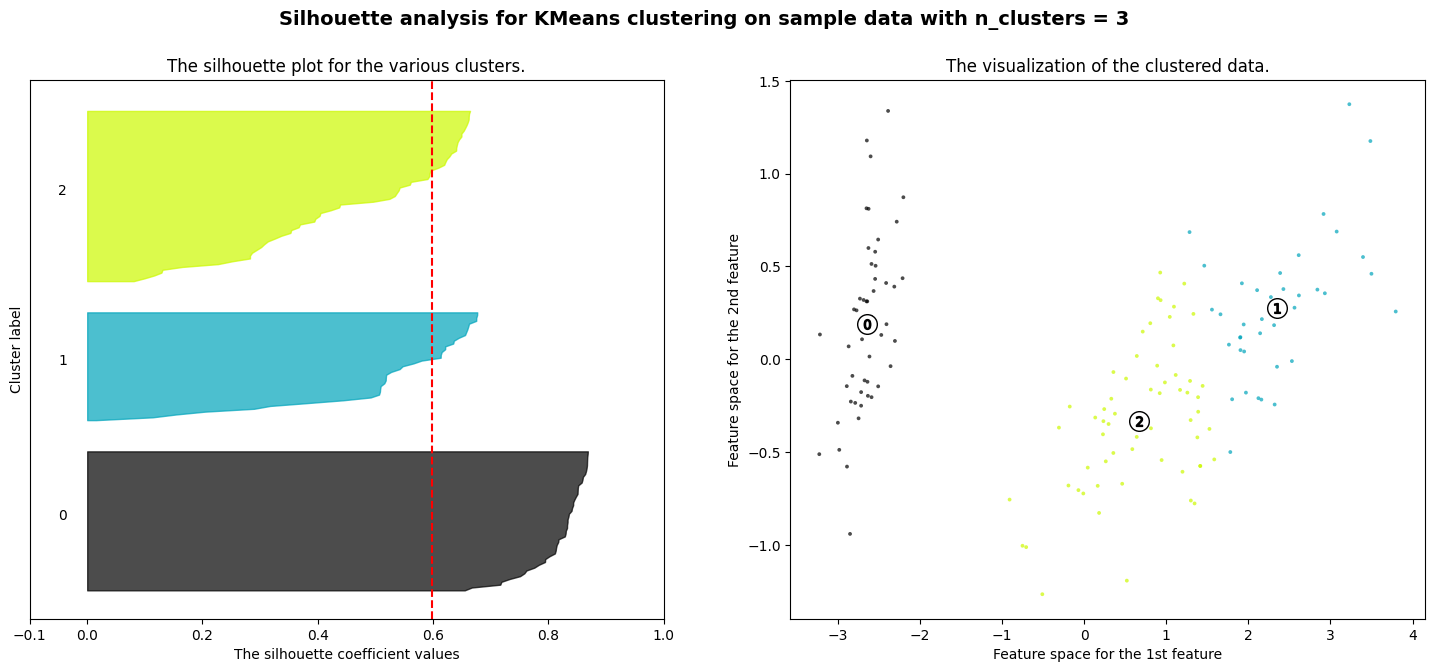

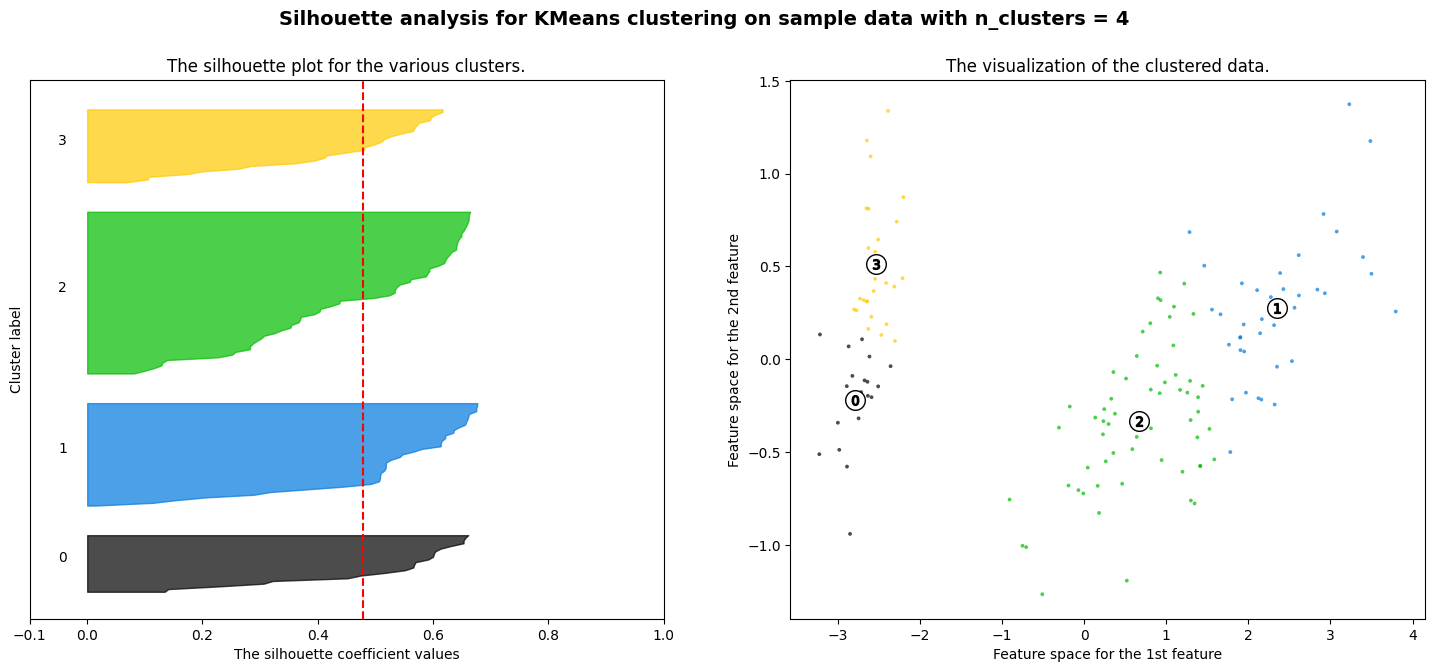

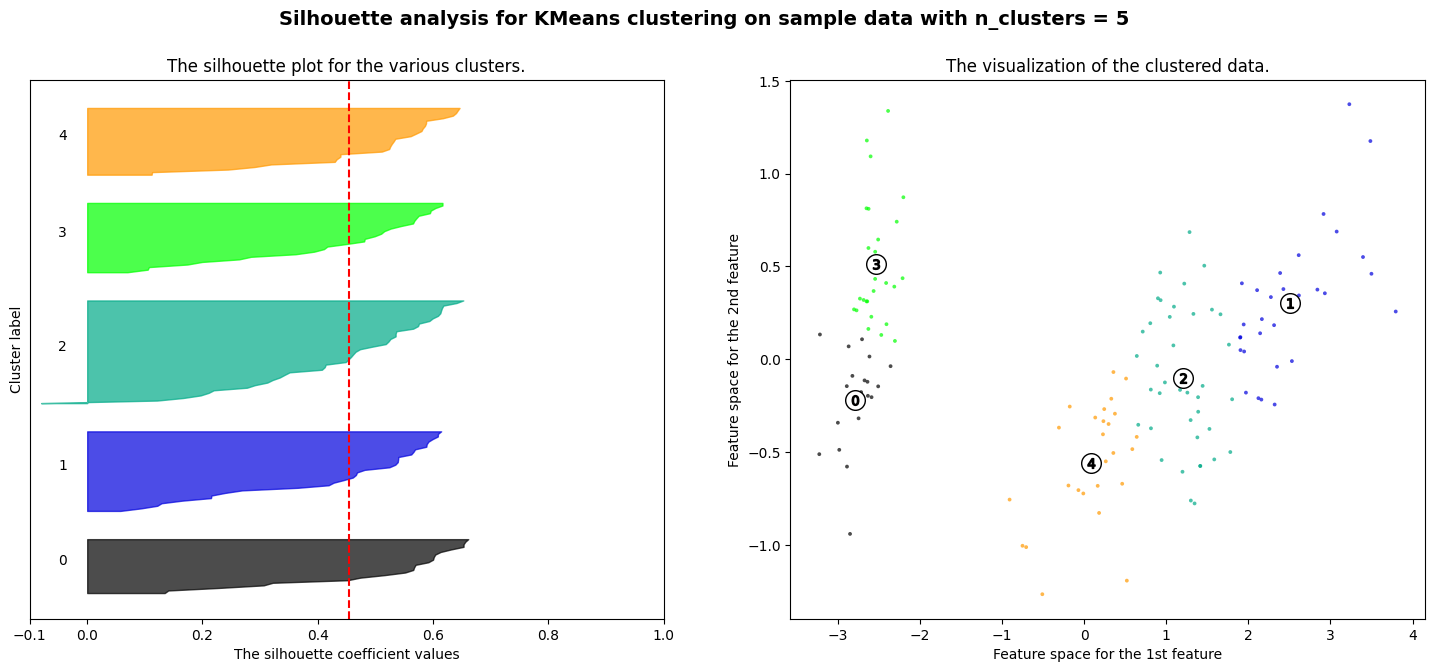

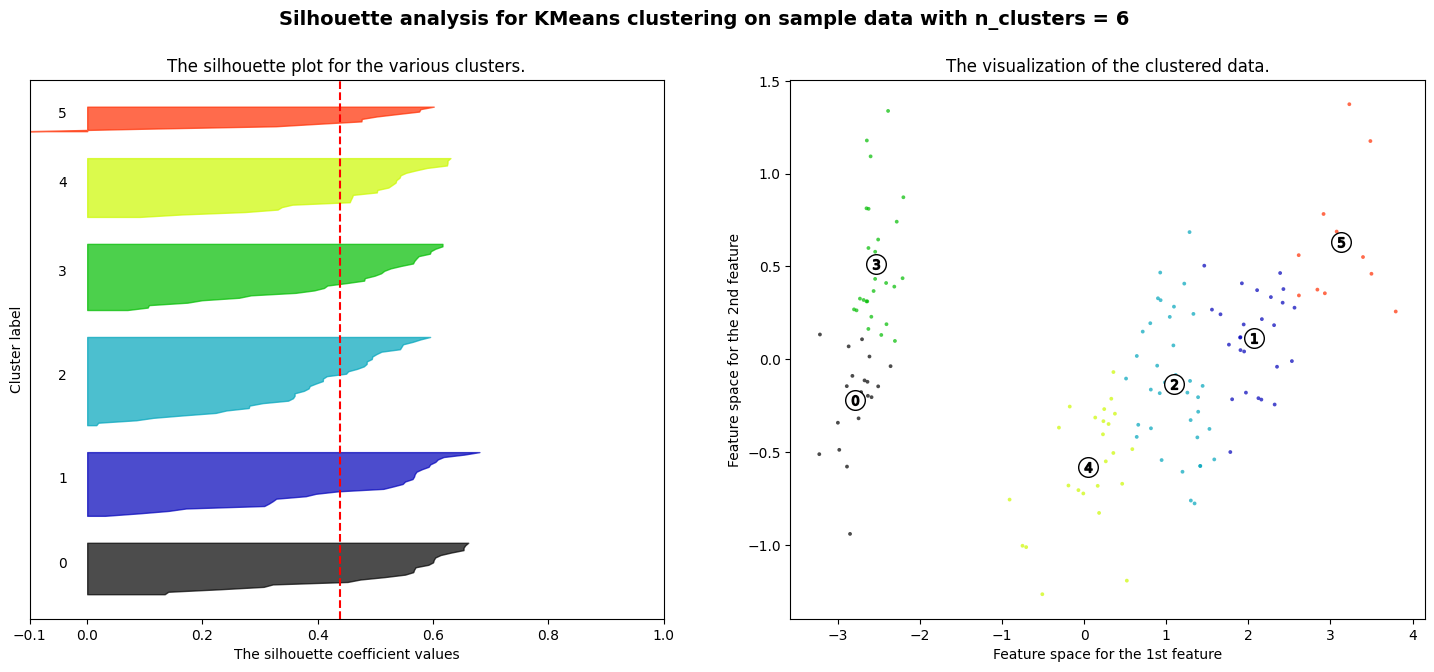

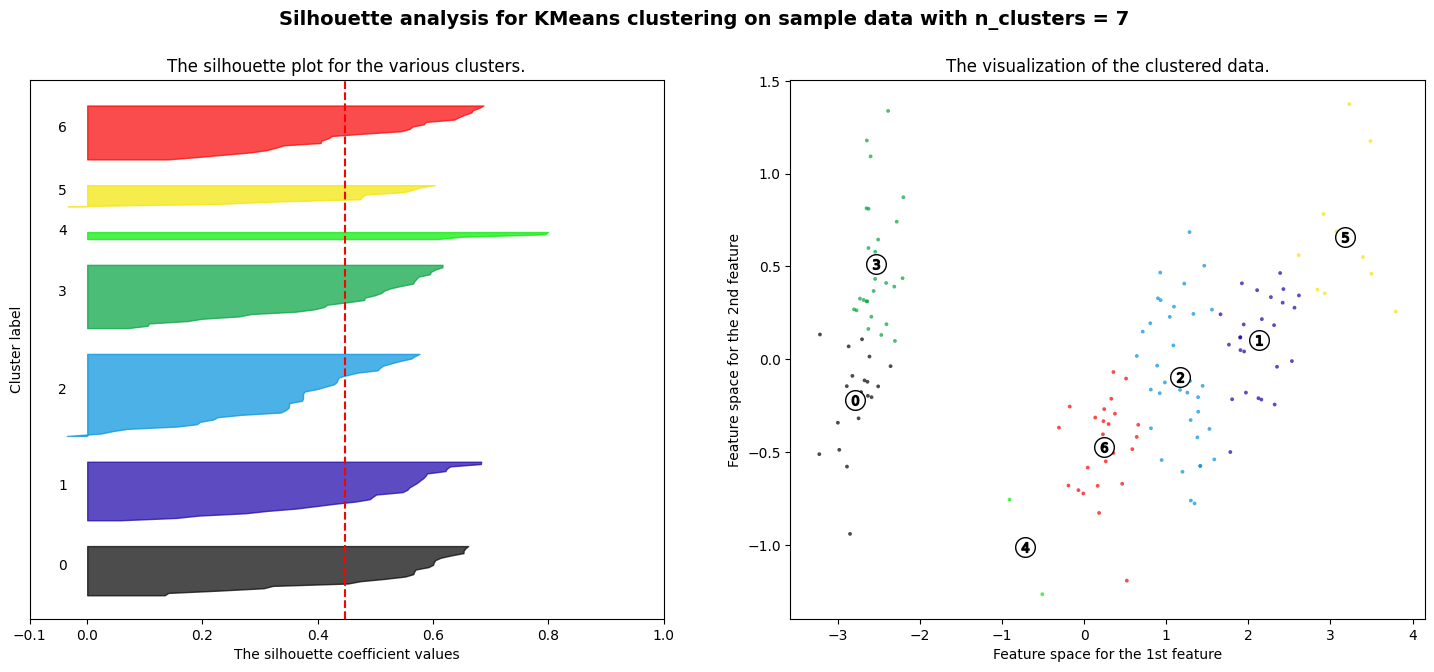

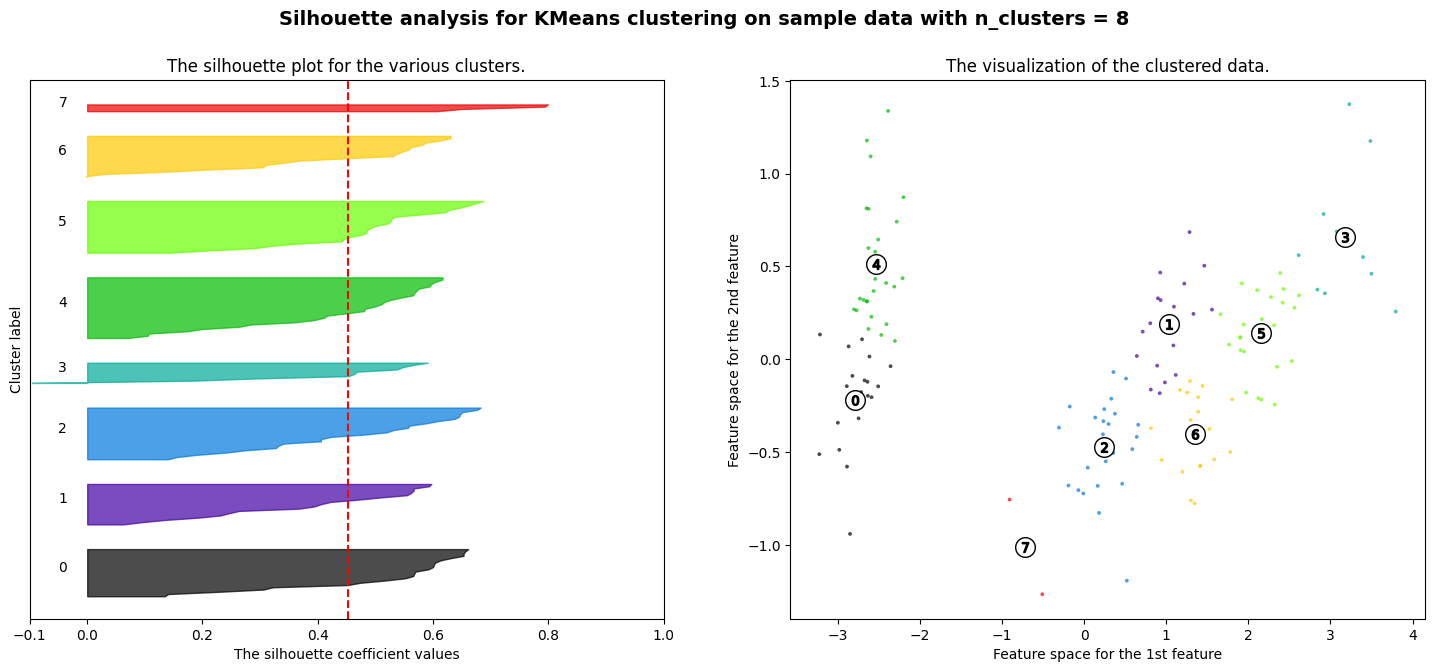

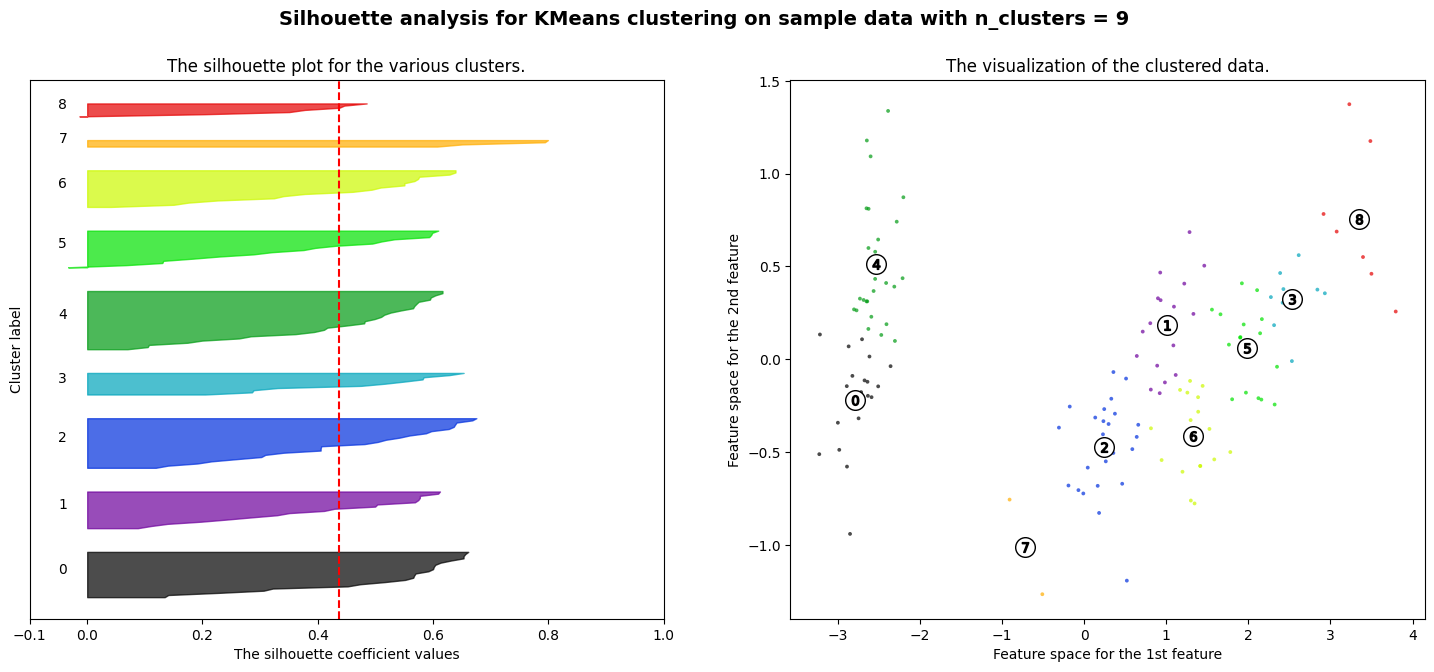

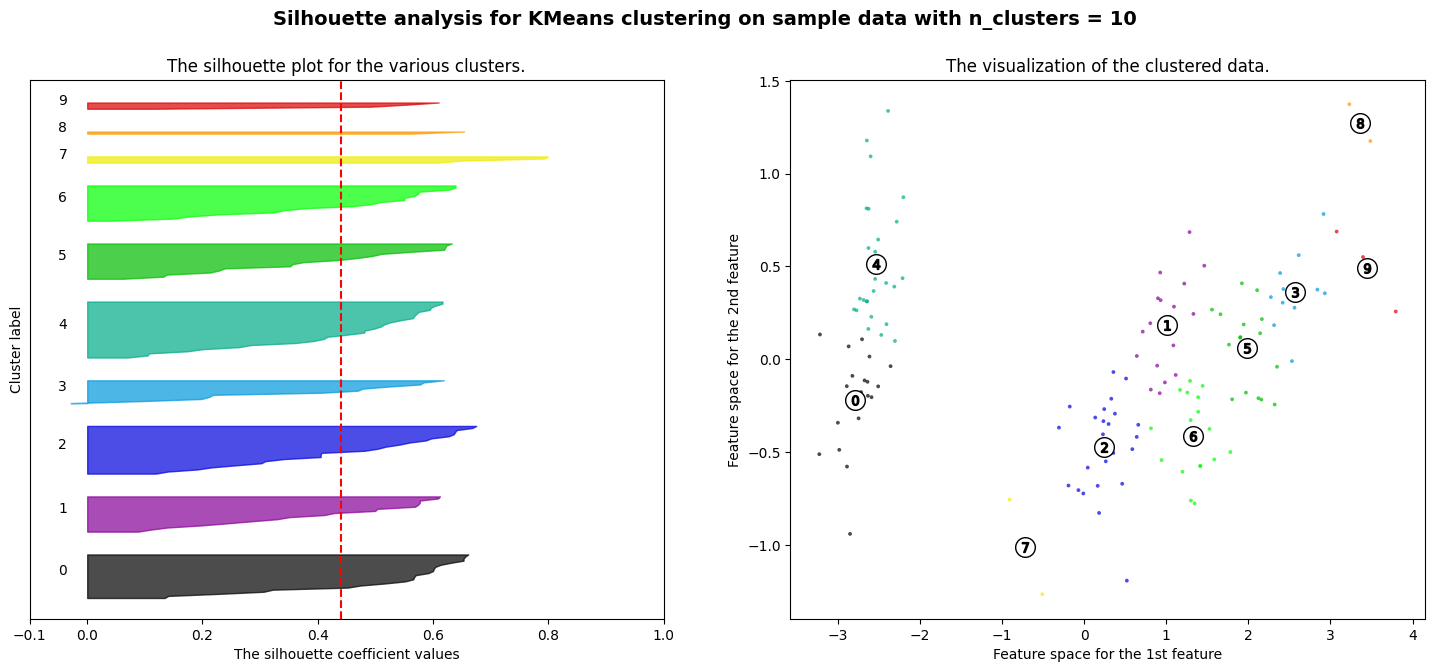

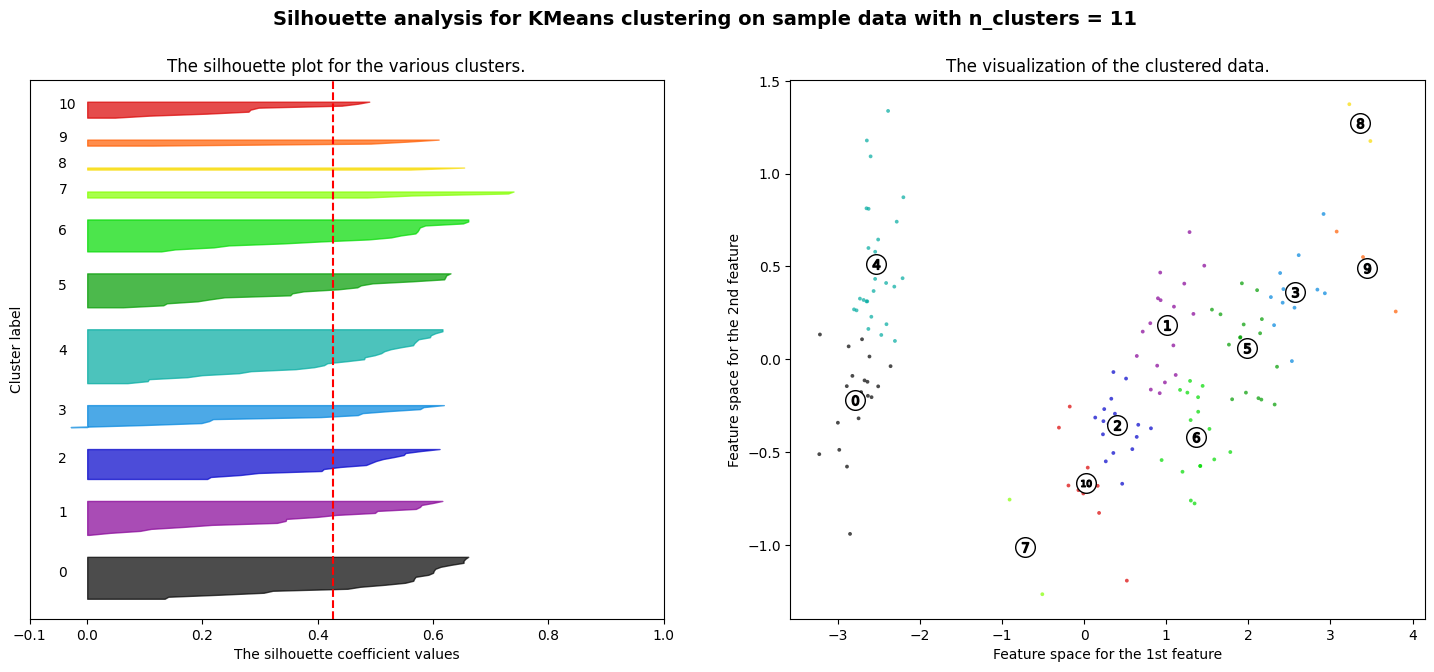

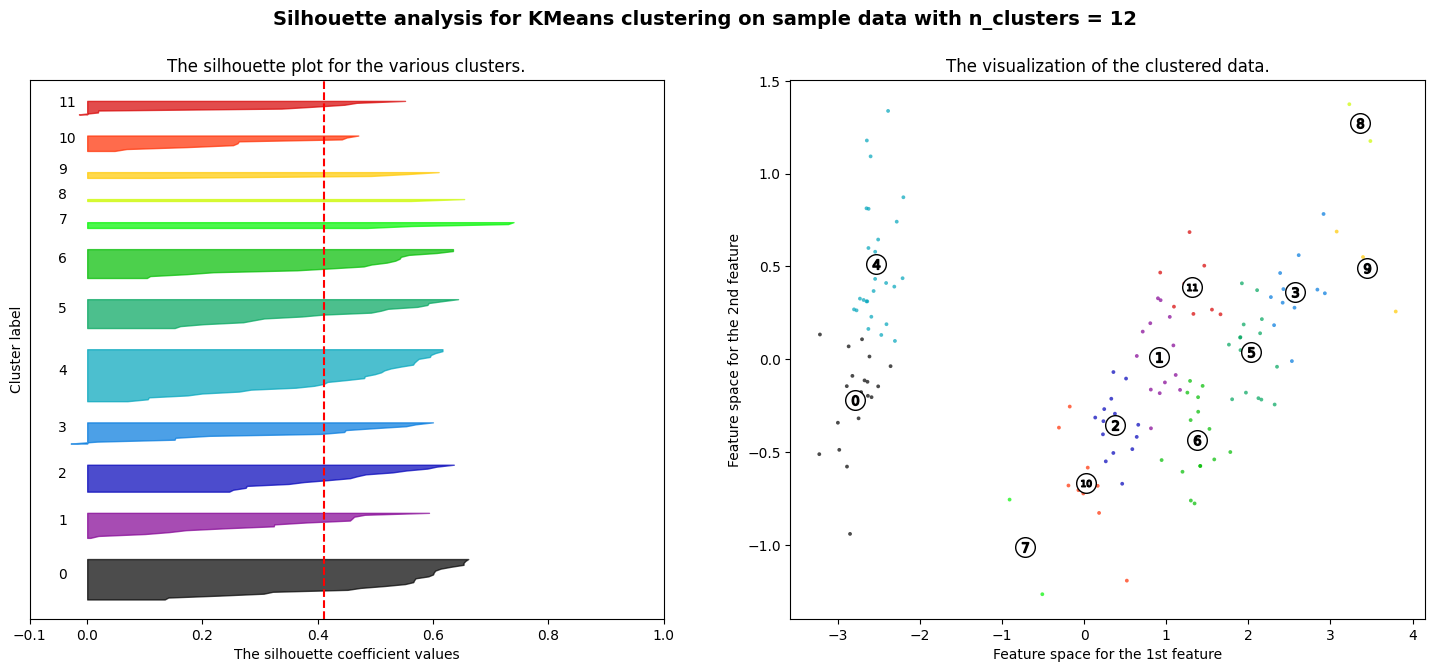

In [16]:
from src.clusters import get_clusters_silhouettes
from src.visual import draw_silhouettes


silhouettes = get_clusters_silhouettes(reduced_data, random_state)
draw_silhouettes(reduced_data, silhouettes)